<style>
  .tab_space{
        margin-left:15px;
    }
</style>
<div style="">
    <h2 style="text-align:left;">Title Goes Here</h2>
    <p class="tab_space" style="margin-left:15px;">
        The explanations goes Here. e.g. we will programming the <span style="color:red"> Normal Probability Plot</span> in 3rd slide of proffessor Samimi's presentations, page 6.
        <br>
        The Main purpose is to show the efficieny of working with<span style="color:orange"> jupyter lab notebooks</span> which make us show and run the code in same place and show the result and codes better.
       <br>
        The comments which has been wrote in the script will guide the readers, but we will explain the process here briefly.
        <br><br>
        At first we will get data from csv file and then we will change it to Panda's dataframe
        <br>
        Then we are going to calculate the <span style="color:red">Mean and standard deviation</span>
    </p>
    <h3>Mean</h3>
            <span style="font-size:20px;text-align:center;">$$\frac{1}{n}\times{\sum^{n}_{i=1}{x_i}}$$</span>
    <h3>Standard Deviation</h3>
         <span style="font-size:20px;text-align:center;">$$ {\displaystyle s = {\sqrt {\frac {\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}{N-1}}} } $$</span>
    <p class="tab_space" style="margin-left:15px;">
        <br>
        As you can see, we are able to write mathematics equations as well.
        <br>
        After this we can calculate <span style="font-style:italic">cumulative probability</span> , <span style="font-style:italic">Si</span> and <span style="font-style:italic">si</span> Arrays as well and relate these arrays to output column.
        <br>
        in last we will make the plot of the output of previous function.
    </p>
    <hr style="width:25%;margin-left:0">
</div>

In [1]:
import numpy as np
import statistics 
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt


# Normalizing Data in Python (Page 6 - Slide 3rd)
def getNormalDataFrame(csv_address,column_name):
    
    # Getting DataFrame
    data = pd.read_csv(csv_address)
    
    # Sorting DataFrame
    data = data.sort_values(by=[column_name] , ascending=True)
    
    # Getting Target Column
    target_column = np.array(data[column_name])
    
    # Calculating Standard Deviation
    standard_deviation = statistics.stdev(target_column)
    
    # Calculating Mean
    mean = statistics.mean(target_column)
    
    # Calculating Cumulative Probability Array and 
    P_array = []
    # Inverse of standard normal cumulative distribution
    Si_array = []
    for index,value in enumerate(target_column):
        P_array.append((index+1)/(target_column.size+1))
        Si_array.append(norm.ppf(P_array[index]))
    # Calculating Normal Probability (s)
    si_array = list((np.array(target_column)-mean)/standard_deviation)
    # Shape The Output DataFrame
    resultDataFrame = pd.DataFrame({
        "Target Column":target_column,
        "Cumulative Probability":P_array,
        "Normal Quntile":Si_array,
        "Sorted Numbers 2":si_array
    })
    
    # Style Index and Numbering
    resultDataFrame.index += 1
    resultDataFrame.index.name = "N"
    return resultDataFrame


def plotting_results(dataFrame):
    plt.grid(True)
    plt.xlim([min(dataFrame["Normal Quntile"]), max(dataFrame["Normal Quntile"])])
    plt.plot(dataFrame["Normal Quntile"],dataFrame["Sorted Numbers 2"])
    x = np.arange(min(dataFrame["Normal Quntile"]), max(dataFrame["Normal Quntile"]), 0.01)	
    plt.plot(x,x)
    plt.xlabel("$Si = (\phi^{-1}(P_i)$)",fontsize=9)
    plt.ylabel("$si = (\dfrac{x_i - \mu}{\sigma}$)",fontsize=9)
    return plt

<div style="">
    <h2 style="text-align:left;">Getting The Result</h2>
    <p class="tab_space" style="margin-left:15px;">
        We can show diffrenet part of codes in HTML styles to show the UI of jupyter lab such as dataframes, plots, mathematics equations and etc.
        <br>
        For Each purpose, we can run a different cell, to separate each part of the programm and explain them better.
        <br>
        <br>
        So we use the upper cell code and then use the result in next cells.
        <br>
        In the next cells, we first try to use first function and show output dataframe first, and then in the second cell we will use the last fuction to plot this dataframe details.
        <br><br>
    </p>
    <hr style="width:25%;margin-left:0">
</div>

In [2]:
# Read File. Please Pay Attention, file which named "concrete_strenght.csv" exists
# in same directory
dataFrame = getNormalDataFrame("../concrete_strenght.csv","data")
display(dataFrame)

,Target Column,Cumulative Probability,Normal Quntile,Sorted Numbers 2
N,,,,
1,29.0,0.038462,-1.768825,-2.411251
2,31.7,0.076923,-1.426077,-1.819183
3,33.8,0.115385,-1.198380,-1.358686
4,35.9,0.153846,-1.020076,-0.898189
5,36.5,0.192308,-0.869424,-0.766618
6,37.9,0.230769,-0.736316,-0.459620
7,38.6,0.269231,-0.615141,-0.306121
8,38.6,0.307692,-0.502402,-0.306121
9,39.3,0.346154,-0.395725,-0.152622


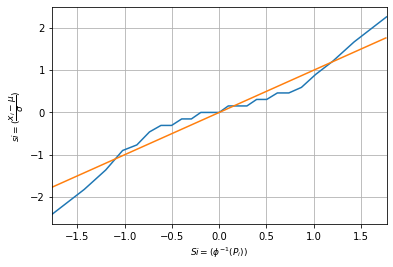

In [3]:
# Plotting the DataFrame
a = plotting_results(dataFrame)
a.savefig("foo.png")